In [155]:
import matplotlib.pyplot as plt
import numpy as np
import os
from operator import itemgetter

In [156]:
folders = ("data/swim_tmb", "data/nude_tmb", "data/scho_tmb")
walks = [os.walk(folder) for folder in folders]
files = [list(walk)[0][2] for walk in walks]

In [157]:
sizes = []
for i in range(3):
    sizes.append([os.path.getsize(folders[i] + "/" + file) for file in files[i]])
fileandsize = []
for i in range(3):
    fileandsize.append(list(zip(files[i], sizes[i])))
sizes = [sorted(size) for size in sizes]

15434 67516
13414 63508
14142 66370


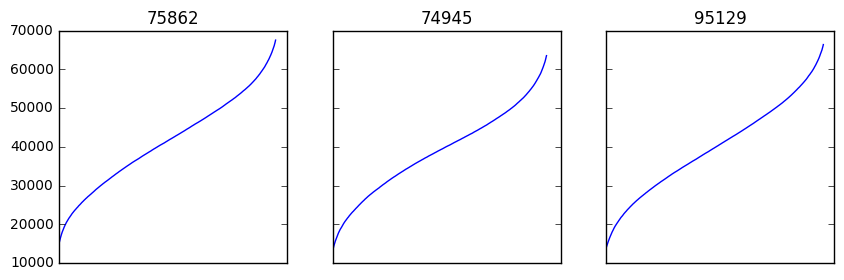

In [158]:
f, plots = plt.subplots(1, 3, sharey=True)
for i in range(3):
    size = sizes[i]
    cut = len(size) // 50
    size = size[cut:-cut]
    plots[i].plot(size)
    plots[i].get_xaxis().set_visible(False)
    plots[i].set_title(len(size))
    print(size[0], size[-1])
f.set_size_inches(10, 3)
plt.show()

### Result: 

Remove the *approximately* 2% largest and the 2% smallest files from the dataset. Goal is to have three categories where each one holds exactly 74.000 images.

In [159]:
fileandsize = [sorted(tup,key=itemgetter(1)) for tup in fileandsize]

In [164]:
for i in range(3):
    cfiles = fileandsize[i]
    l = len(cfiles)
    cut = (l - 75000) // 2
    ccfiles = cfiles[cut:-cut]
    if len(ccfiles) == 75001:
        ccfiles = ccfiles[1:]
    assert len(ccfiles) == 75000
    filenames, filesizes = zip(*ccfiles)
    with open(folders[i] + "/" + "cut.txt", "w") as fd:
        for filename in filenames:
            fd.write(filename + "\n")